# Preparación del notebook

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Importar librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

%matplotlib inline

# Regresión Logística
Consideremos un caso de uso en el que tenemos que predecir los resultados de los exámenes de los estudiantes de un curso universitario, es decir, clasificar los resultados en términos de aprobado (1) o No aprobado (0) en función de las horas de estudio dedicadas por cada estudiante.


Se cuenta un conjunto de datos de estudiantes y su dedicación de estudio en términos de horas. A continuación se detallan las variables disponibles:


*   Pass_or_Fail: etiqueta que tiene dos valores: 1 o 0. Un valor de 1 indica aprobación de examen y un valor de 0 indica No aprobación del examen.
*   Self_Study_Daily: indica cuántas horas el estudiante estudia diariamente en casa para la presentación del examen
*   Tuition_Monthly: indica cuántas horas al mes el estudiante está tomando clases particulares de tutoría.

Documentación del modelo: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [3]:
# Lectura de los datos
df_students = pd.read_csv('https://raw.githubusercontent.com/mlondono-oc/LEA2/main/Modulo-2/data/student-pass-fail-data.csv')
df_students.head(3)

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
0,7,27,1
1,2,43,0
2,7,26,1


## Exploración de los datos

In [4]:
# Tamaño del dataset
df_students.shape

(1000, 3)

In [5]:
# Información general del dataset
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Self_Study_Daily  1000 non-null   int64
 1   Tution_Monthly    1000 non-null   int64
 2   Pass_Or_Fail      1000 non-null   int64
dtypes: int64(3)
memory usage: 23.6 KB


In [6]:
# Exploración de los datos
df_students.describe()

,Self_Study_Daily,Tution_Monthly,Pass_Or_Fail
count,1000.000000,1000.000000,1000.000000
mean,5.744000,31.230000,0.499000
std,2.121076,5.976355,0.500249
min,0.000000,20.000000,0.000000
25%,4.000000,26.000000,0.000000
50%,6.000000,30.000000,0.000000
75%,7.000000,36.000000,1.000000
max,10.000000,50.000000,1.000000


In [7]:
# Preparación inicial de los datos
df_students = df_students.rename(columns = {'Pass_Or_Fail': 'target', 'Self_Study_Daily': 'self_study', 'Tution_Monthly': 'tution_monthly'})

<Axes: xlabel='target'>

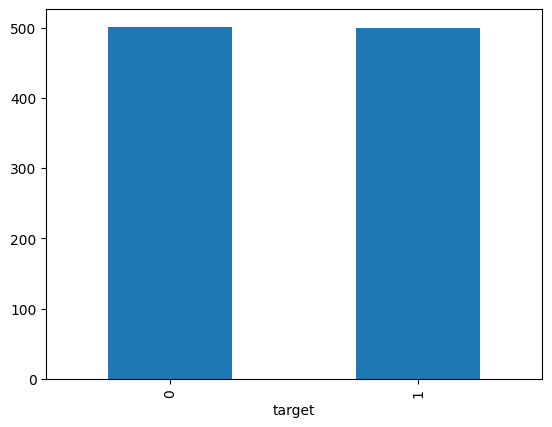

In [8]:
df_students['target'].value_counts().plot(kind = 'bar')

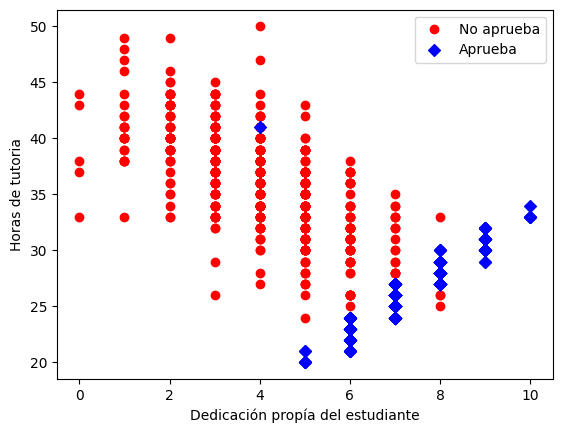

In [9]:
# Veamos la distribución de los datos por clase
plt.scatter(df_students['self_study'][df_students.target == 0],
            df_students['tution_monthly'][df_students.target == 0],
            marker='o',
            color = 'red',
            label = 'No aprueba'
            )
plt.scatter(df_students['self_study'][df_students.target == 1],
            df_students['tution_monthly'][df_students.target == 1],
            marker='D',
            color = 'blue',
            label = 'Aprueba'
            )
plt.xlabel('Dedicación propía del estudiante')
plt.ylabel('Horas de tutoria')
plt.legend()
plt.show()


## Marco de validación

In [10]:
# Separación de variables
y = df_students.target
x = df_students.drop(['target'], axis=1)

In [11]:
# Separación de los datos de entrenamiento y validación
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

print('Tamaño del conjunto de entrenamiento: ', x_train.shape)
print('Tamaño del conjunto de validación: ', x_test.shape)

Tamaño del conjunto de entrenamiento:  (800, 2)
Tamaño del conjunto de validación:  (200, 2)


## Regresión Logística

In [12]:
from sklearn.metrics import accuracy_score

# Entrenamiento del modelo
modelo = LogisticRegression()

# Ajustar el modelo a los datos
modelo.fit(x_train, y_train)

# Desempeño en el entrenamiento
y_train_pred = modelo.predict(x_train)

print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_train, y_train_pred) )

Exactitud en el entrenamiento: 0.975


## Evaluación del modelo de regresión logística

In [13]:
y_pred = modelo.predict(x_test)

# Exactitud en el conjunto de validación
print('Exactitud en el entrenamiento: %.3f'  %accuracy_score(y_test, y_pred) )

Exactitud en el entrenamiento: 0.980


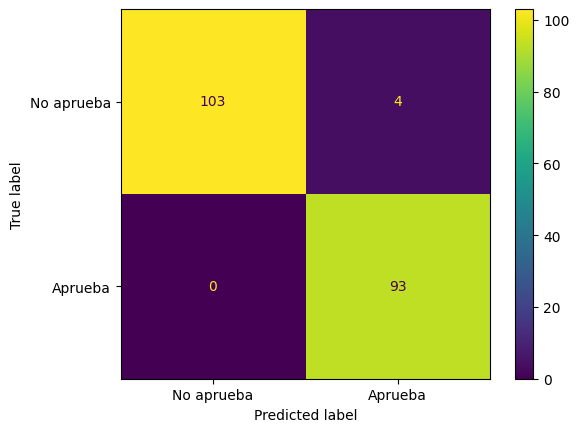

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mc = confusion_matrix(y_test, y_pred)

mc_display = ConfusionMatrixDisplay(confusion_matrix=mc, display_labels=['No aprueba', 'Aprueba'])
mc_display.plot()
plt.show()

In [15]:
mc

array([[103,   4],
       [  0,  93]], dtype=int64)

In [16]:
tn, fp, fn, tp = mc.ravel()

precision = tp / (tp + fp)
recall = tp / (tp + fn)
especificidad = tn / (fp + tn)
f1_score = 2*(precision*recall)/(precision+recall)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Especificidad: {especificidad}')
print(f'F1 score: {f1_score}')

Precision: 0.9587628865979382
Recall: 1.0
Especificidad: 0.9626168224299065
F1 score: 0.9789473684210526


In [17]:
from sklearn.metrics import f1_score
print('f1_score:', f1_score(y_test, y_pred))

f1_score: 0.9789473684210527


In [18]:
# Para probabilidades
prediction_1 = modelo.predict_proba(np.array([10, 45]).reshape(1, -1))

In [19]:
prediction_1
# no aprueba 99%

array([[0.99649881, 0.00350119]])

In [20]:
modelo.classes_

array([0, 1], dtype=int64)

# Ejercicio
Gráficar la curva ROC Y cálcular el AUC

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot

# Calculamos el AUC
lr_auc = roc_auc_score(y_test, y_pred)
# Imprimimos en pantalla
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))

Regresión Logística: ROC AUC=0.981


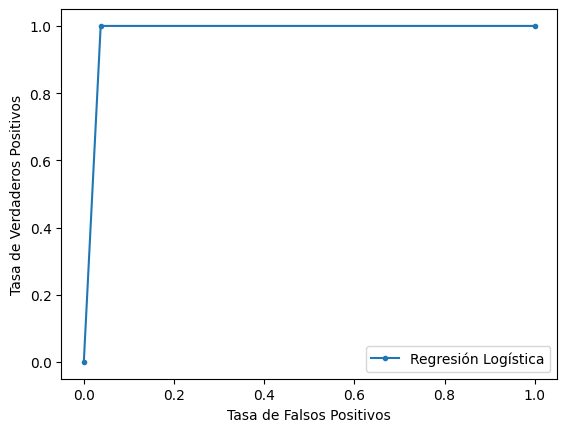

In [23]:
# Calculamos las curvas ROC
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

# Pintamos las curvas ROC
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')

# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()